# AIN427 TERM PROJECT - PREDICTING HEART DISEASE MORTALITY RATE
# B2210765024 - İLBEY GÜLMEZ


## Reading the Data

In [1]:
import os
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
os.chdir('drive/MyDrive/Colab Notebooks')

In [4]:
data = pd.read_csv('data.csv')

## Data Exploration

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


In [7]:
data.shape

(59076, 19)

In [8]:
data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'GeographicLevel', 'DataSource',
       'Class', 'Topic', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'TopicID', 'LocationID', 'Location 1'],
      dtype='object')

From the histogram below, it can be seen that data contains a lot of NaN values and they should be handled. Also it can be seen that data is very noisy.

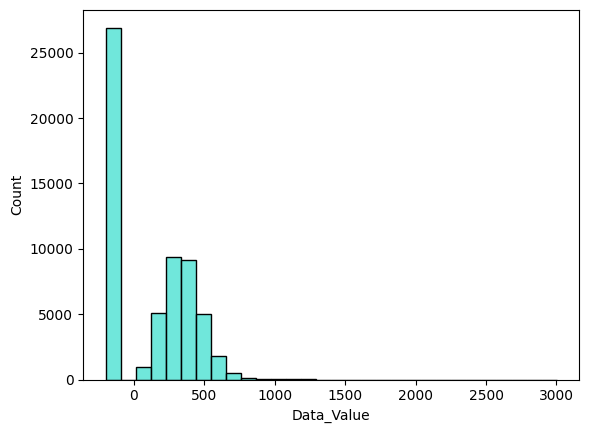

In [9]:
plot_data = data['Data_Value'].fillna(-200) #NaN values are marked as -200
sns.histplot(plot_data, bins=30, kde=False, color='turquoise', edgecolor='black')
plt.show()

## Data Preprocessing

In [10]:
for column in data:   # If there is 1 type of column in the data, drop the column
  if len(data[column].unique()) == 1:
    print(f"In {column} column all cells contain {data[column][0]}")
    data = data.drop(column, axis = 1)

In Year column all cells contain 2014
In DataSource column all cells contain NVSS
In Class column all cells contain Cardiovascular Diseases
In Topic column all cells contain Heart Disease Mortality
In Data_Value_Unit column all cells contain per 100,000 population
In StratificationCategory1 column all cells contain Gender
In StratificationCategory2 column all cells contain Race/Ethnicity
In TopicID column all cells contain T2


In LocationDesc, there are 2015 unique values. Too much dimension in values will result in low accuracy, so it should be reduced. LocationAbbr columns are abbreviations of the exact locations, it also generalizes them too. For example, Aleutians East and Aleutians West are both abbreviated as AK. Thus, LocationDesc will be dropped and LocationAbbr will be used in the model.

In [11]:
print(f"LocationDesc : {len(data['LocationDesc'].unique())}")
print(f"LocationAbbr : {len(data['LocationAbbr'].unique())}")


LocationDesc : 2015
LocationAbbr : 57


In [12]:
data = data.drop('LocationDesc', axis = 1)

'Data_Value_Footnote' and 'Data_Value_Footnote_Symbol' are indicators of values being NaN or not. it can already be seen in 'Data_Value' column, so they can be dropped too.

In [13]:
print(f"'Data_Value_Footnote' values : {data['Data_Value_Footnote'].unique()}")
print(f"'Data_Value_Footnote_Symbol' values : {data['Data_Value_Footnote_Symbol'].unique()}")

'Data_Value_Footnote' values : [nan 'Insufficient Data']
'Data_Value_Footnote_Symbol' values : [nan '~']


In [14]:
data = data.drop(['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'], axis = 1)

LocationID won't be necessary for the prediction process. So it can be dropped.

In [15]:
data = data.drop('LocationID', axis = 1)

In [16]:
data

,LocationAbbr,GeographicLevel,Data_Value,Data_Value_Type,Stratification1,Stratification2,Location 1
0,AK,County,105.3,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,"(55.440626, -161.962562)"
1,AK,County,211.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,"(52.995403, -170.251538)"
2,AK,County,257.9,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,"(61.159049, -149.103905)"
3,AK,County,351.6,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,"(60.924483, -159.749655)"
4,AK,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Overall,Overall,"(58.754192, -156.694709)"
...,...,...,...,...,...,...,...
59071,TX,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Asian and Pacific Islander,"(33.613697, -101.820878)"
59072,TX,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Male,Black,"(32.306972, -100.919542)"
59073,IA,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Asian and Pacific Islander,"(43.375754, -93.73907)"
59074,WV,County,NaN,"Age-adjusted, Spatially Smoothed, 3-year Avera...",Female,Asian and Pacific Islander,"(38.995666, -80.505332)"


- Rename LocationAbbr as location

- Rename GeographicLevel as geographic_level

- Rename Data_Value as mortality

- Rename Data_Value_Type as mortality_type

- Rename Stratification1 as gender

- Rename Stratification2 as race

- Rename Location 1 as coordinates

In [17]:
data.columns

Index(['LocationAbbr', 'GeographicLevel', 'Data_Value', 'Data_Value_Type',
       'Stratification1', 'Stratification2', 'Location 1'],
      dtype='object')

In [ ]:
data = data.rename(columns = {'LocationAbbr' : 'location' , 'GeographicLevel' : 'geographic_level' ,'Data_Value' : 'mortality','Data_Value_Type' : 'mortality_type', 'Stratification1' : 'gender', 'Stratification2' : 'race', 'Location 1' : 'coordinates'})

From the outputs below, it can be concluded that:

1 - location should be LabelEncoded

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
location_encoded = le.fit_transform(data['location'])
location_encoded = pd.DataFrame(location_encoded, columns = ['location'])

data = data.drop('location', axis = 1)

data.insert(0, 'location' ,location_encoded)

2 - In geographic level, there is 58050 rows which is 'County' in 59000 rows. The ones that is not 'County' could be dropped since their contribution to mddel would be insignificant. After that, geographic_level column will also be dropped since it has 1 unique value. This way, not only data is simplified, also dimensions are reduced.

In [ ]:
data = data[data['geographic_level'] == 'County']
data = data.drop('geographic_level', axis = 1)

3 - mortality should be cleaned and its null values handled. This will be handled after the others.

4 - mortality_type should be handled in a different way or One-Hot Encoded

In [ ]:
print(f"Mortality Type column has only : {data['mortality_type'].unique()}") # It has 1 unique value so column will be dropped.
data = data.drop('mortality_type', axis = 1)

Mortality Type column has only : ['Age-adjusted, Spatially Smoothed, 3-year Average Rate']


5 - gender should be One-Hot Encoded

In [ ]:
gender_encoded = pd.get_dummies(data['gender'])
gender_encoded = gender_encoded.rename(columns = {'Overall' : 'Overall_Gender'})

data = data.drop('gender', axis = 1)
data = pd.concat([data, gender_encoded], axis = 1)

6 - race should be One-Hot Encoded

In [ ]:
race_encoded = pd.get_dummies(data['race'])
race_encoded = race_encoded.rename(columns = {'Overall' : 'Overall_Race'})

data = data.drop('race', axis = 1)
data = pd.concat([data, race_encoded], axis = 1)

7 - coordinates should be replaced with their euclidian values

In [ ]:
def euclidean_distance(coord_str):
    coordinates = np.array([float(x) for x in coord_str[1:-1].split(",")])
    return "{:.2f}".format(np.linalg.norm(coordinates))

In [ ]:
data['coordinates'] = data['coordinates'].apply(euclidean_distance)

In [ ]:
data.isnull().sum()

location                                  0
mortality                             26745
coordinates                               0
Female                                    0
Male                                      0
Overall_Gender                            0
American Indian and Alaskan Native        0
Asian and Pacific Islander                0
Black                                     0
Hispanic                                  0
Overall_Race                              0
White                                     0
dtype: int64

There is a awful lot NaN values in mortality column. Multiple solutions will be tried on this.

All solutions will be checked and the method with the best performance will be used.

1 - Multiple Imputation (MICE Imputation)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
mice_imputer = IterativeImputer(random_state=100, max_iter=30)
mice_imputer.fit(data) #takes a while

IterativeImputer(max_iter=30, random_state=100)

In [ ]:
data_mice = mice_imputer.transform(data)
data_mice = pd.DataFrame(data_mice, columns = data.columns)

2 - Regression Imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer()
knn_imputer.fit(data)

KNNImputer()

In [ ]:
data_knn = knn_imputer.transform(data) #takes a good while
data_knn = pd.DataFrame(data_knn, columns = data.columns)

3 - Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
mean_imputer = SimpleImputer(strategy='mean')
mean_imputer.fit(data)

SimpleImputer()

In [ ]:
data_mean = mean_imputer.transform(data)
data_mean = pd.DataFrame(data_mean, columns = data.columns)

4 - Simply dropping them

In [ ]:
data_drop = data.dropna()

Now that the all null values are handled, its time to handle outliers.

With LocalOutlierFactor, outliers will be labeled as -1, and by returning their index, outliers are assigned to NaN. Then they're filled again with the same method.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

In [ ]:
lof = LocalOutlierFactor(novelty=False)

In [ ]:
def handle_outliers(data_cleaned, model):

  outlier_labels = lof.fit_predict(np.array(data_cleaned['mortality']).reshape(-1, 1))
  outlier_indices = np.where(outlier_labels == -1)[0]
  data_cleaned.loc[outlier_indices, 'mortality'] = np.nan

  #Now to fill in NaN values again

  model.fit(data_cleaned)
  data_return = model.transform(data_cleaned)
  data_return = pd.DataFrame(data_return, columns = data_cleaned.columns)

  return data_return

In [ ]:
data_mice = handle_outliers(data_mice, IterativeImputer(random_state=100, max_iter=5))

In [ ]:
data_knn = handle_outliers(data_knn, KNNImputer())

In [ ]:
data_mean = handle_outliers(data_mean, SimpleImputer(strategy='mean'))

Data won't be scaled since it contains coordinates.

## Model Selection

4 Regression models will be tried and evaluated for this case. One with the best performance will be used.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
def calculate_mse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def calculate_mape(y_true, y_pred, epsilon=1e-10):
    absolute_percentage_error = np.abs((y_true - y_pred) / (y_true + epsilon))
    return np.mean(absolute_percentage_error) * 100

In [ ]:
def fit_evaluate(model_call, data):
  X = data.drop('mortality', axis = 1)
  y = data['mortality']
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 123)
  model = model_call.fit(X_train, y_train)
  predicted = model.predict(X_test)
  train_r2 = model.score(X_train, y_train)
  test_r2 = model.score(X_test, y_test)
  mse = calculate_mse(y_test, predicted) # Wellness of scaling
  mape = calculate_mape(y_test, predicted) # How well the impact of outliers are decreased

  scores = [train_r2, test_r2, mse, mape]
  print(f"R2 score for train set {model} is : {train_r2:.2f}")
  print(f"R2 score for test set {model} is : {test_r2:.2f}")
  print(f"MSE error for {model} is : {mse:.2f}")
  print(f"MAPE error for {model} is : {mape:.2f}")
  return scores

Performance for Linear Regression

In [ ]:
scores_lr_mice = fit_evaluate(LinearRegression(), data_mice)

R2 score for train set LinearRegression() is : 0.74
R2 score for test set LinearRegression() is : 0.73
MSE error for LinearRegression() is : 5149.57
MAPE error for LinearRegression() is : 13.37


In [ ]:
scores_lr_knn = fit_evaluate(LinearRegression(), data_knn)

R2 score for train set LinearRegression() is : 0.43
R2 score for test set LinearRegression() is : 0.42
MSE error for LinearRegression() is : 11243.09
MAPE error for LinearRegression() is : 28.89


In [ ]:
scores_lr_mean = fit_evaluate(LinearRegression(), data_mean)

R2 score for train set LinearRegression() is : 0.21
R2 score for test set LinearRegression() is : 0.21
MSE error for LinearRegression() is : 8001.74
MAPE error for LinearRegression() is : 23.59


In [ ]:
scores_lr_drop = fit_evaluate(LinearRegression(), data_drop)

R2 score for train set LinearRegression() is : 0.49
R2 score for test set LinearRegression() is : 0.49
MSE error for LinearRegression() is : 9828.89
MAPE error for LinearRegression() is : 24.68


In [ ]:
scores_lr = [scores_lr_mice, scores_lr_knn, scores_lr_mean, scores_lr_drop]

Performance for RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
scores_rf_mice = fit_evaluate(RandomForestRegressor(max_depth=None, random_state=123), data_mice)

R2 score for train set RandomForestRegressor(random_state=123) is : 0.97
R2 score for test set RandomForestRegressor(random_state=123) is : 0.81
MSE error for RandomForestRegressor(random_state=123) is : 3685.31
MAPE error for RandomForestRegressor(random_state=123) is : 11.44


In [ ]:
scores_rf_knn = fit_evaluate(RandomForestRegressor(max_depth=None, random_state=123), data_knn)

R2 score for train set RandomForestRegressor(random_state=123) is : 0.97
R2 score for test set RandomForestRegressor(random_state=123) is : 0.84
MSE error for RandomForestRegressor(random_state=123) is : 3080.61
MAPE error for RandomForestRegressor(random_state=123) is : 10.94


In [ ]:
scores_rf_mean = fit_evaluate(RandomForestRegressor(max_depth=None, random_state=123), data_mean)

R2 score for train set RandomForestRegressor(random_state=123) is : 0.92
R2 score for test set RandomForestRegressor(random_state=123) is : 0.51
MSE error for RandomForestRegressor(random_state=123) is : 4972.40
MAPE error for RandomForestRegressor(random_state=123) is : 14.66


In [ ]:
scores_rf_drop = fit_evaluate(RandomForestRegressor(max_depth=None, random_state=123), data_drop)

R2 score for train set RandomForestRegressor(random_state=123) is : 0.95
R2 score for test set RandomForestRegressor(random_state=123) is : 0.70
MSE error for RandomForestRegressor(random_state=123) is : 5714.83
MAPE error for RandomForestRegressor(random_state=123) is : 16.15


In [ ]:
scores_rf = [scores_rf_mice, scores_rf_knn, scores_rf_mean, scores_rf_drop]

## Model Evaluation

Performance for SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
scores_svr_mice = fit_evaluate(make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), data_mice) #takes a good while

R2 score for train set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.74
R2 score for test set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.74
MSE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 4995.23
MAPE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 13.36


In [ ]:
scores_svr_knn = fit_evaluate(make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), data_knn)

R2 score for train set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.48
R2 score for test set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.48
MSE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 10117.84
MAPE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 24.43


In [ ]:
scores_svr_mean = fit_evaluate(make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), data_mean)

R2 score for train set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.22
R2 score for test set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.23
MSE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 7824.04
MAPE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 19.96


In [ ]:
scores_svr_drop = fit_evaluate(make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), data_drop)

R2 score for train set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.51
R2 score for test set Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 0.52
MSE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 9200.50
MAPE error for Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.2))]) is : 21.76


In [ ]:
scores_svr = [scores_svr_mice, scores_svr_knn, scores_svr_mean, scores_svr_drop]

Performance for XGBoost (Gradient Boosting Regression)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
score_xg_mice = fit_evaluate(GradientBoostingRegressor(random_state=123), data_mice)

R2 score for train set GradientBoostingRegressor(random_state=123) is : 0.79
R2 score for test set GradientBoostingRegressor(random_state=123) is : 0.79
MSE error for GradientBoostingRegressor(random_state=123) is : 4041.30
MAPE error for GradientBoostingRegressor(random_state=123) is : 13.69


In [ ]:
score_xg_knn = fit_evaluate(GradientBoostingRegressor(random_state=123), data_knn)

R2 score for train set GradientBoostingRegressor(random_state=123) is : 0.63
R2 score for test set GradientBoostingRegressor(random_state=123) is : 0.62
MSE error for GradientBoostingRegressor(random_state=123) is : 7353.01
MAPE error for GradientBoostingRegressor(random_state=123) is : 22.51


In [ ]:
score_xg_mean = fit_evaluate(GradientBoostingRegressor(random_state=123), data_mean)

R2 score for train set GradientBoostingRegressor(random_state=123) is : 0.43
R2 score for test set GradientBoostingRegressor(random_state=123) is : 0.44
MSE error for GradientBoostingRegressor(random_state=123) is : 5730.56
MAPE error for GradientBoostingRegressor(random_state=123) is : 19.30


In [ ]:
score_xg_drop = fit_evaluate(GradientBoostingRegressor(random_state=123), data_drop)

R2 score for train set GradientBoostingRegressor(random_state=123) is : 0.65
R2 score for test set GradientBoostingRegressor(random_state=123) is : 0.66
MSE error for GradientBoostingRegressor(random_state=123) is : 6616.78
MAPE error for GradientBoostingRegressor(random_state=123) is : 19.19


In [ ]:
scores_xg = [score_xg_mice, score_xg_knn, score_xg_mean, score_xg_drop]

Performance for Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
score_mlp_mice = fit_evaluate(MLPRegressor(random_state=123, max_iter=250), data_mice)

R2 score for train set MLPRegressor(max_iter=250, random_state=123) is : 0.74
R2 score for test set MLPRegressor(max_iter=250, random_state=123) is : 0.73
MSE error for MLPRegressor(max_iter=250, random_state=123) is : 5102.77
MAPE error for MLPRegressor(max_iter=250, random_state=123) is : 14.14


In [ ]:
score_mlp_knn = fit_evaluate(MLPRegressor(random_state=123, max_iter=250), data_knn)

R2 score for train set MLPRegressor(max_iter=250, random_state=123) is : 0.50
R2 score for test set MLPRegressor(max_iter=250, random_state=123) is : 0.50
MSE error for MLPRegressor(max_iter=250, random_state=123) is : 9830.87
MAPE error for MLPRegressor(max_iter=250, random_state=123) is : 25.80


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
score_mlp_mean = fit_evaluate(MLPRegressor(random_state=123, max_iter=250), data_mean)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score for train set MLPRegressor(max_iter=250, random_state=123) is : 0.31
R2 score for test set MLPRegressor(max_iter=250, random_state=123) is : 0.31
MSE error for MLPRegressor(max_iter=250, random_state=123) is : 7051.10
MAPE error for MLPRegressor(max_iter=250, random_state=123) is : 21.30


In [ ]:
score_mlp_drop = fit_evaluate(MLPRegressor(random_state=123, max_iter=250), data_drop)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


R2 score for train set MLPRegressor(max_iter=250, random_state=123) is : 0.53
R2 score for test set MLPRegressor(max_iter=250, random_state=123) is : 0.54
MSE error for MLPRegressor(max_iter=250, random_state=123) is : 8887.33
MAPE error for MLPRegressor(max_iter=250, random_state=123) is : 24.08


In [ ]:
scores_mlp = [score_mlp_mice, score_mlp_knn, score_mlp_mean, score_mlp_drop]

Comparing Imputers' Performances:

In [ ]:
def generate_metrics(scores):
  metrics = []
  for i in range(4):
    arr = [score[i] for score in scores]
    metrics.append(arr)
  return metrics

def barplot_imp(model_title, scores):
    imputers = ['MICE', 'kNN', 'Mean', 'Dropping']
    metrics = generate_metrics(scores) # 0 train_r2, 1 test_r2, 2 mse, 3 maPE
    # Create a 2x2 subplot
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Plot train R2 scores
    sns.barplot(x=imputers, y=metrics[0], ax=axes[0, 0])
    axes[0, 0].set_title(f'Train R2 Score of {model_title}')
    axes[0, 0].set_xlabel('Imputers')
    axes[0, 0].set_ylabel('Train R2 Score')

    # Plot test R2 scores
    sns.barplot(x=imputers, y=metrics[1], ax=axes[0, 1])
    axes[0, 1].set_title(f'Test R2 Score of {model_title}')
    axes[0, 1].set_xlabel('Imputers')
    axes[0, 1].set_ylabel('Test R2 Score')

    # Plot MSE scores
    sns.barplot(x=imputers, y=metrics[2], ax=axes[1, 0])
    axes[1, 0].set_title(f'MSE Error for {model_title}')
    axes[1, 0].set_xlabel('Imputers')
    axes[1, 0].set_ylabel('MSE')

    # Plot MAPE scores
    sns.barplot(x=imputers, y=metrics[3], ax=axes[1, 1])
    axes[1, 1].set_title(f'MAPE Error for {model_title}')
    axes[1, 1].set_xlabel('Imputers')
    axes[1, 1].set_ylabel('MAPE')

    # Adjust layout
    plt.tight_layout()
    plt.show()

For Linear Regression:

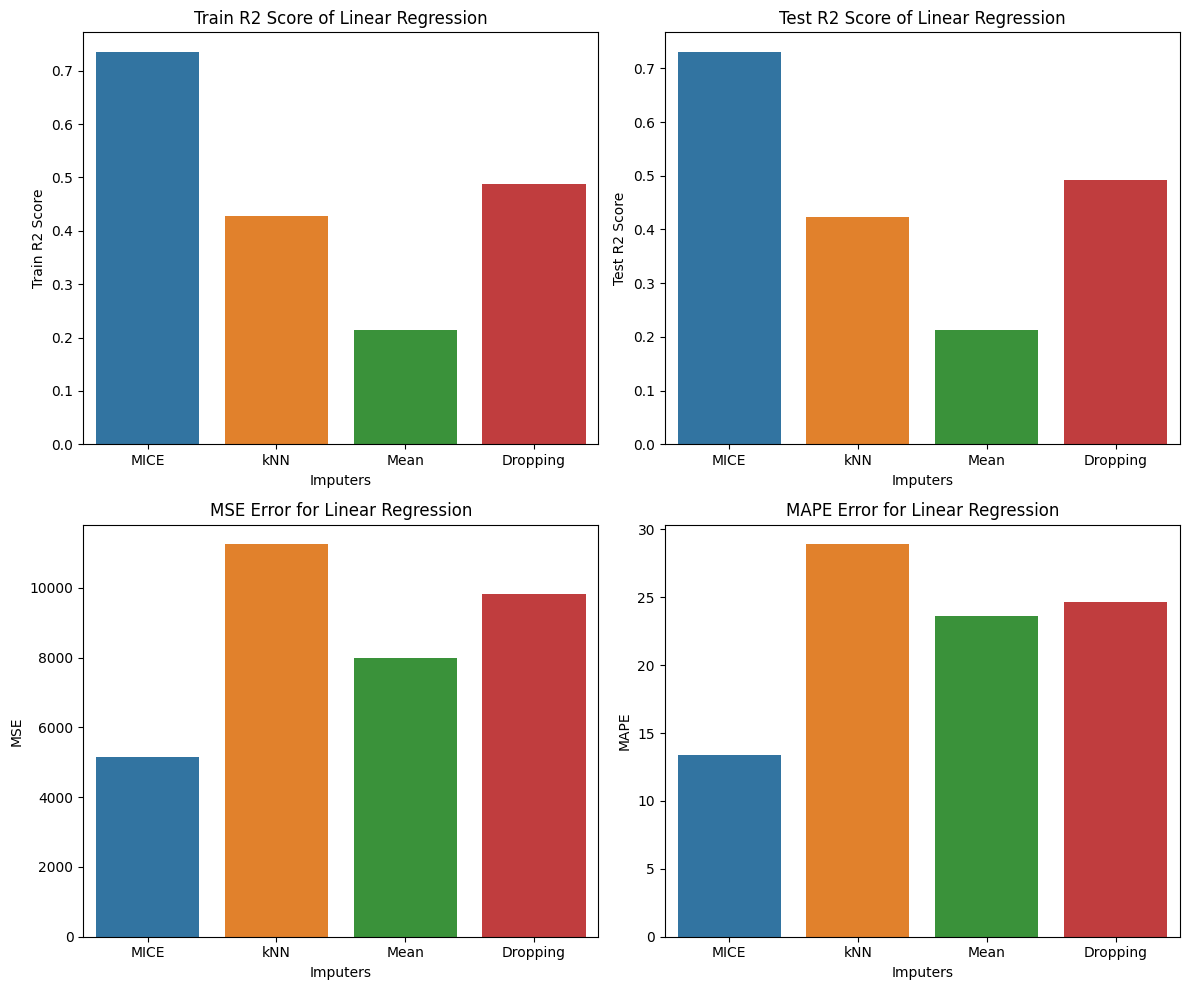

In [ ]:
barplot_imp("Linear Regression", scores_lr)

For Random Forest:

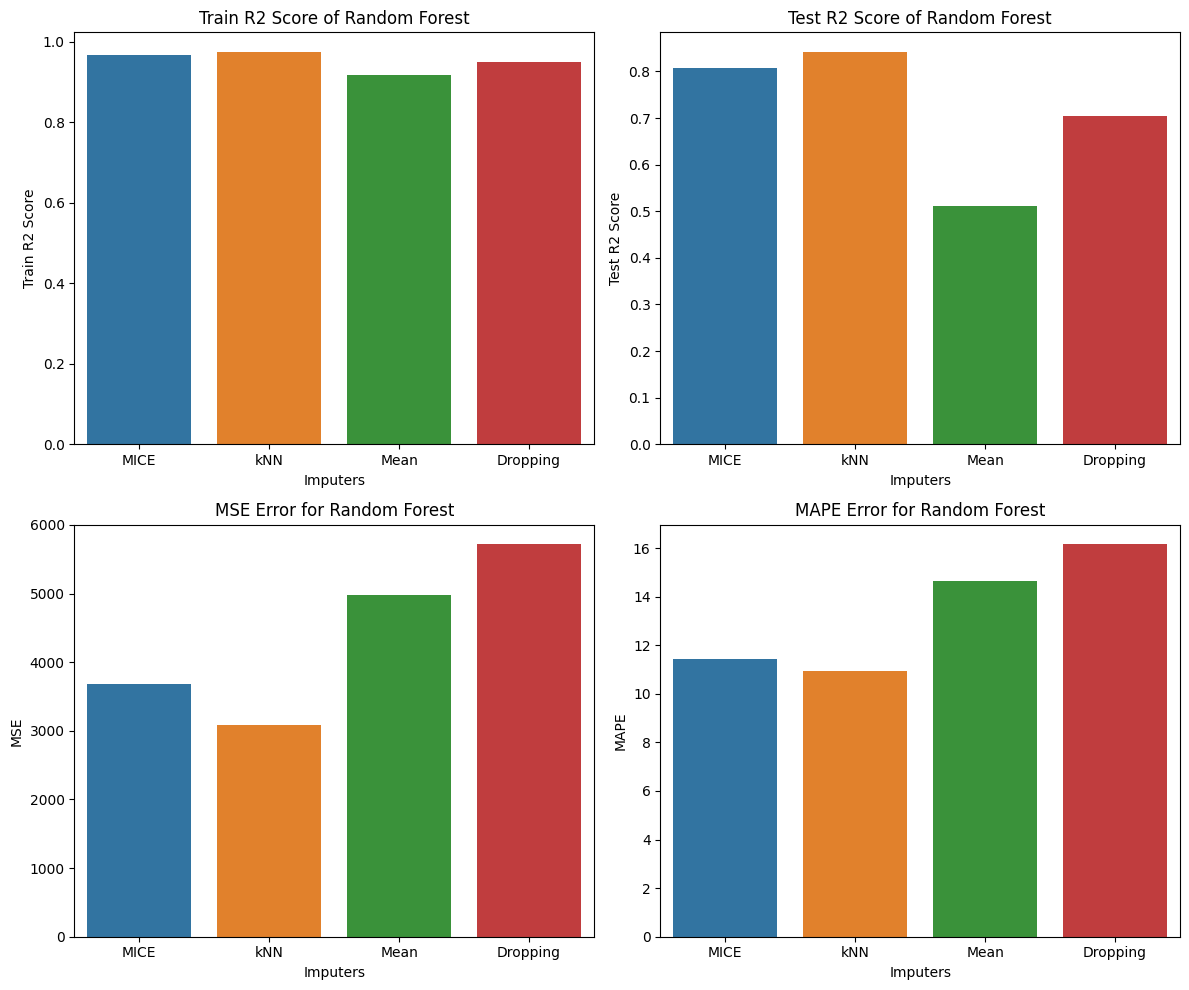

In [ ]:
barplot_imp("Random Forest", scores_rf)

For XGBoost:

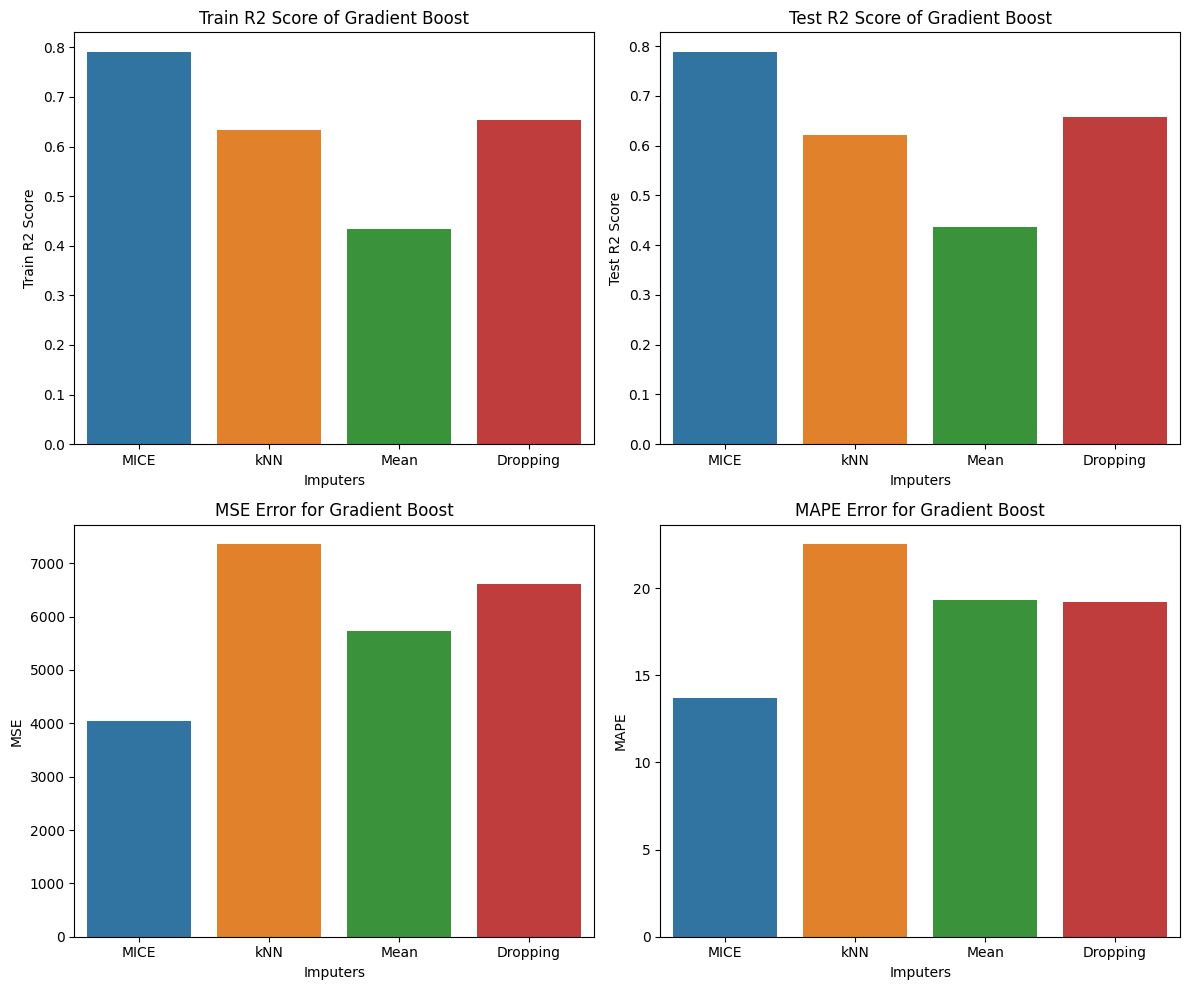

In [ ]:
barplot_imp("Gradient Boost", scores_xg)

For SVR:

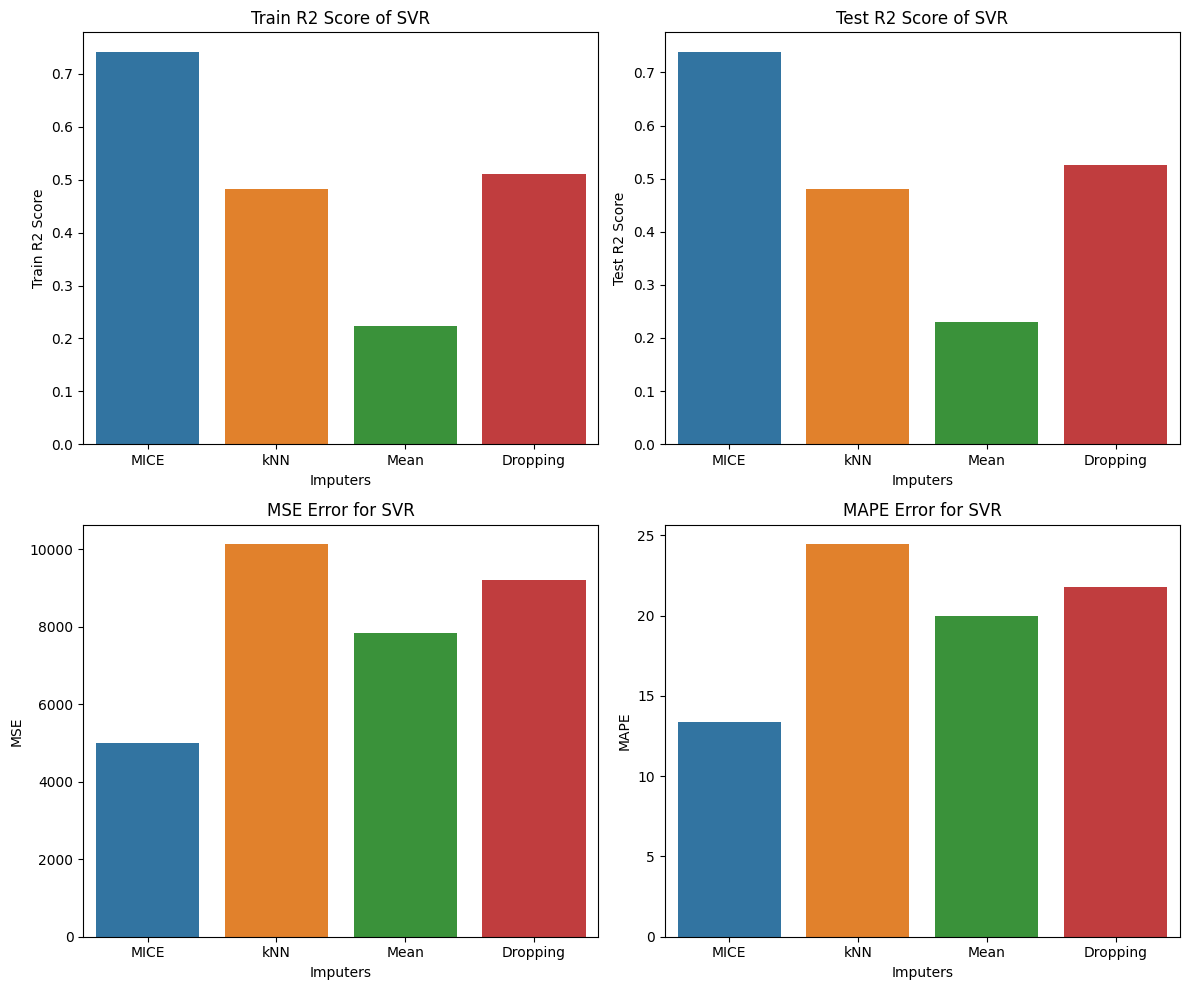

In [ ]:
barplot_imp("SVR", scores_svr)

For MLP:

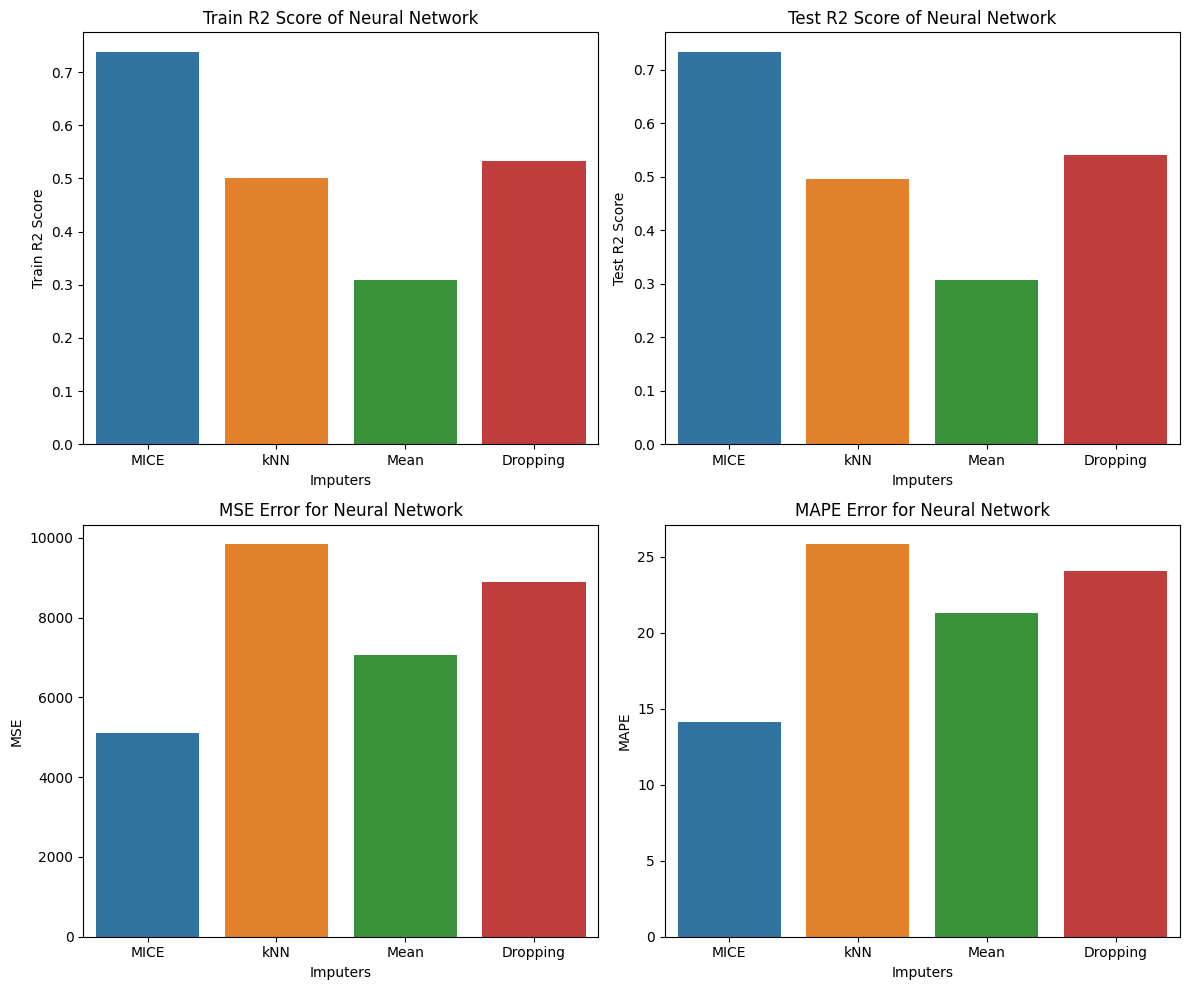

In [ ]:
barplot_imp("Neural Network", scores_mlp)

It can be concluded from above, MICE outperforms other imputer techniques in 3 of 4 models. In RandomForest, kNN outperforms all. Also, simple imputing or dropping NaN values on this dataset resulted on inconsistent low performance. So when number of NaN values are high, it is wiser to multiple impute or regression impute.

Comparing Models' Performances

In [ ]:
scores = [scores_lr[0], scores_rf[1], scores_xg[0], scores_svr[0], scores_mlp[0]]
metrics = generate_metrics(scores)
models = ['LR', 'RF','XG', 'SVR', 'MLP']

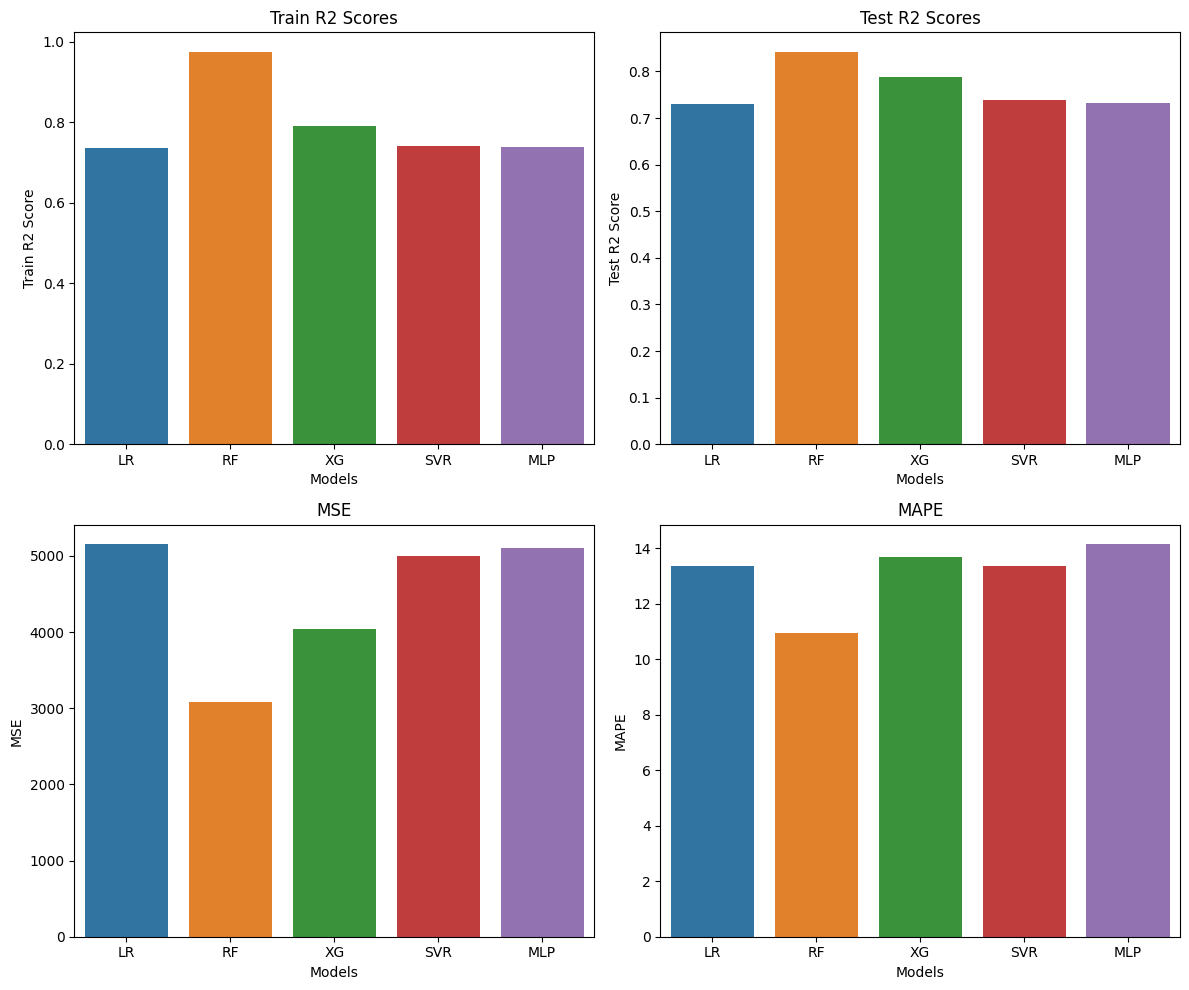

In [ ]:
# Create a 2x2 subplot
fig2, axes2 = plt.subplots(2, 2, figsize=(12, 10))

# Plot train R2 scores
sns.barplot(x=models, y=metrics[0], ax=axes2[0, 0])
axes2[0, 0].set_title(f'Train R2 Scores')
axes2[0, 0].set_xlabel('Models')
axes2[0, 0].set_ylabel('Train R2 Score')

# Plot test R2 scores
sns.barplot(x=models, y=metrics[1], ax=axes2[0, 1])
axes2[0, 1].set_title(f'Test R2 Scores')
axes2[0, 1].set_xlabel('Models')
axes2[0, 1].set_ylabel('Test R2 Score')

# Plot MSE scores
sns.barplot(x=models, y=metrics[2], ax=axes2[1, 0])
axes2[1, 0].set_title(f'MSE')
axes2[1, 0].set_xlabel('Models')
axes2[1, 0].set_ylabel('MSE')

# Plot MAPE scores
sns.barplot(x=models, y=metrics[3], ax=axes2[1, 1])
axes2[1, 1].set_title(f'MAPE')
axes2[1, 1].set_xlabel('Models')
axes2[1, 1].set_ylabel('MAPE')

plt.tight_layout()
plt.show()


From the graphs above, it can be concluded that model that performs best on this dataset is Random Forest. It is predictable because data is unscaled. After that, XGBoost had a relatively good performance despite its high MAPE values. That means Gradient Boost Regression is affected by outliers. Even though it fits well to the data.

## Report

### 1. Introduction:

The goal of this project was to predict heart disease mortality rates based on various factors, including race, gender, and geographical coordinates. The dataset initially contained 59076 rows and 19 columns, with over 25000 samples having NaN values.

The project followed a structured approach, involving data preprocessing, imputation, outlier handling, and model selection.

### 2. Data Preprocessing:

#### 2.1 Column Selection:
Unnecessary columns were identified and dropped, resulting in a dataset with 7 columns: 'LocationAbbr', 'GeographicLevel', 'Data_Value', 'Data_Value_Type', 'Stratification1', 'Stratification2', and 'Location 1'.

#### 2.2 Missing Values:
Different imputation techniques, including MICE, kNN, mean imputation or simply dropping missing values were applied. The chosen method depended on the model's performance.

#### 2.3 Coordinate Transformation:
Coordinate values were transformed into their Euclidean distance to convert them into numerical features.

#### 2.4 Outlier Handling:
Outliers were addressed using the Local Outlier Factor (LOF) algorithm from scikit-learn.

#### 2.5 Model-Dependent Preprocessing:
Data was labeled and one-hot encoded as needed for different regression models.

### 3. Model Selection:

Five regression models were considered for predicting heart disease mortality rates: Linear Regression, Random Forest, Support Vector Regression (SVR), XGBoost, and Neural Network. The dataset was split into training and testing sets for model evaluation.

### 4. Imputation Technique Comparison:

A systematic comparison of different imputation techniques was conducted for each model. MICE imputation performed well across multiple metrics, while kNN imputation showed superiority with the Random Forest model.

### 5. Model Evaluation and Comparison:

A function was defined to graphically compare the performances of different models using the best-imputed data. RandomForest emerged as the top-performing model, main reason can be RandomForest's compatibility with unscaled data. XGBoost performed well but showed sensitivity to outliers, indicated by a high MAPE error.

### 6. Conclusion:

In conclusion, the RandomForest model, trained on MICE-imputed data, proved to be the most effective in predicting heart disease mortality rates. The decision not to scale data, considering the inclusion of coordinates, was validated by RandomForest's strong performance.

The project highlights the importance of thorough preprocessing, imputation, and careful consideration of model characteristics in predictive modeling tasks.

### 7. Future Work:

Future work could set a decision boundary and convert this problem to a Yes/No binary classification problem.
